In [ ]:
 print("SOLUTION SEEKERS")

SOLUTION SEEKERS


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")


In [ ]:
death_df.head()


state      country       lat       long  1/22/20  1/23/20  1/24/20  1/25/20  \
0   NaN  Afghanistan  33.93911  67.709953        0        0        0        0   
1   NaN      Albania  41.15330  20.168300        0        0        0        0   
2   NaN      Algeria  28.03390   1.659600        0        0        0        0   
3   NaN      Andorra  42.50630   1.521800        0        0        0        0   
4   NaN       Angola -11.20270  17.873900        0        0        0        0   

   1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0        0        0  ...     7896    7896    7896    7896    7896    7896   
1        0        0  ...     3598    3598    3598    3598    3598    3598   
2        0        0  ...     6881    6881    6881    6881    6881    6881   
3        0        0  ...      165     165     165     165     165     165   
4        0        0  ...     1933    1933    1933    1933    1933    1933   

   3/6/23  3/7/23  3/8/23  3/9/23  
0    7896    7896    7896    7896  
1    3598    3598    3598    3598  
2    6881    6881    6881    6881  
3     165     165     165     165  
4    1933    1933    1933    1933  

[5 rows x 1147 columns]

In [ ]:
country_df.sample(10)

Country_Region          Last_Update       Lat       Long_  Confirmed  \
161       Slovakia  2023-03-10 13:21:02  48.66900   19.699000    2667782   
97      Kyrgyzstan  2023-03-10 13:21:02  41.20438   74.766098     206708   
165   South Africa  2023-03-10 13:21:02 -30.55950   22.937500    4067067   
70         Grenada  2023-03-10 13:21:02  12.11650  -61.679000      19680   
63          France  2023-03-10 13:21:02  46.22760    2.213700   39866718   
23        Botswana  2023-03-10 13:21:02 -22.32850   24.684900     329758   
157         Serbia  2023-03-10 13:21:02  44.01650   21.005900    2500142   
9        Australia  2023-03-10 13:21:02 -25.00000  133.000000   11401996   
30      Cabo Verde  2023-03-10 13:21:02  16.53880  -23.041800      63244   
89          Jordan  2023-03-10 13:21:02  31.24000   36.510000    1746997   

     Deaths  Recovered  Active  Incident_Rate  People_Tested  \
161   21036        NaN     NaN   49087.826549            NaN   
97     2991        NaN     NaN    3168.331522            NaN   
165  102595        NaN     NaN    6857.455459            NaN   
70      238        NaN     NaN   17490.379403            NaN   
63   166176        NaN     NaN   61098.565402            NaN   
23     2801        NaN     NaN   14022.558869            NaN   
157   17881        NaN     NaN   28614.354205            NaN   
9     19578        NaN     NaN   44784.486856            NaN   
30      413        NaN     NaN   11375.065649            NaN   
89    14122        NaN     NaN   17122.150632            NaN   

     People_Hospitalized  Mortality_Rate  UID ISO3  Cases_28_Days  \
161                  NaN        0.788520  703  SVK           5607   
97                   NaN        1.446969  417  KGZ            109   
165                  NaN        2.522580  710  ZAF           9856   
70                   NaN        1.209350  308  GRD              0   
63                   NaN        0.416829  250  FRA         106042   
23                   NaN        0.849411   72  BWA            264   
157                  NaN        0.715199  688  SRB          22172   
9                    NaN        0.171707   36  AUS          71560   
30                   NaN        0.653026  132  CPV              9   
89                   NaN        0.808359  400  JOR              0   

     Deaths_28_Days  
161            62.0  
97              0.0  
165             0.0  
70              0.0  
63            618.0  
23              0.0  
157           150.0  
9             511.0  
30              0.0  
89              0.0

In [ ]:
country_df.describe().T

count          mean           std         min  \
Lat                  199.0  1.873009e+01  2.470822e+01  -71.949900   
Long_                199.0  2.160135e+01  6.723875e+01 -175.198200   
Confirmed            201.0  3.366219e+06  1.012282e+07    1.000000   
Deaths               201.0  3.423858e+04  1.108274e+05    0.000000   
Recovered              0.0           NaN           NaN         NaN   
Active                 0.0           NaN           NaN         NaN   
Incident_Rate        196.0  1.702445e+04  1.886362e+04    0.003879   
People_Tested          0.0           NaN           NaN         NaN   
People_Hospitalized    0.0           NaN           NaN         NaN   
Mortality_Rate       201.0  4.472958e+00  4.227258e+01    0.000000   
UID                  201.0  5.319353e+02  9.451481e+02    4.000000   
Cases_28_Days        201.0  1.997543e+04  8.695968e+04    0.000000   
Deaths_28_Days       200.0  1.376150e+02  7.334444e+02    0.000000   

                              25%            50%           75%           max  
Lat                      4.064892      17.357822  4.010610e+01  6.496310e+01  
Long_                   -6.319850      21.005900  4.953319e+01  1.780650e+02  
Confirmed            37491.000000  317367.000000  1.704502e+06  1.038043e+08  
Deaths                 372.000000    3164.000000  1.907100e+04  1.123836e+06  
Recovered                     NaN            NaN           NaN           NaN  
Active                        NaN            NaN           NaN           NaN  
Incident_Rate         1212.303274    9781.598992  2.674361e+04  6.958572e+04  
People_Tested                 NaN            NaN           NaN           NaN  
People_Hospitalized           NaN            NaN           NaN           NaN  
Mortality_Rate           0.516599       1.075774  1.918753e+00  6.000000e+02  
UID                    212.000000     428.000000  6.620000e+02  9.999000e+03  
Cases_28_Days           16.000000     244.000000  3.153000e+03  9.597940e+05  
Deaths_28_Days           0.000000       0.000000  3.525000e+01  9.451000e+03

In [ ]:
country_df.columns = map(str.lower, country_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)
death_df.columns = map(str.lower, death_df.columns)
confirmed_df. columns = map(str.lower, confirmed_df.columns)

In [ ]:
sorted_country_df = country_df.sort_values('confirmed', ascending=False).head(5)


In [ ]:
sorted_country_df

country_region          last_update        lat       long_  confirmed  \
186             US  2023-03-10 13:21:02  40.000000 -100.000000  103804263   
80           India  2023-03-10 13:21:02  20.593684   78.962880   44690738   
63          France  2023-03-10 13:21:02  46.227600    2.213700   39866718   
67         Germany  2023-03-10 13:21:02  51.165691   10.451526   38249060   
24          Brazil  2023-03-10 13:21:02 -14.235000  -51.925300   37085675   

      deaths  recovered  active  incident_rate  people_tested  \
186  1123836        NaN     NaN   31506.793974            NaN   
80    530779        NaN     NaN    3238.448985            NaN   
63    166176        NaN     NaN   61098.565402            NaN   
67    168935        NaN     NaN   45997.289088            NaN   
24    699310        NaN     NaN   17447.204607            NaN   

     people_hospitalized  mortality_rate  uid iso3  cases_28_days  \
186                  NaN        1.082649  840  USA         959794   
80                   NaN        1.187671  356  IND           5651   
63                   NaN        0.416829  250  FRA         106042   
67                   NaN        0.441671  276  DEU         355168   
24                   NaN        1.885661   76  BRA         170852   

     deaths_28_days  
186          9451.0  
80             29.0  
63            618.0  
67           2275.0  
24           1613.0

In [ ]:
confirmed_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns={'country_region': 'country'})


In [ ]:
import plotly.express as px

In [ ]:
import pandas as pd

def highlight_col(x):
    # Create a DataFrame for styling purposes
    temp_df = pd.DataFrame('', index=x.index, columns=x.columns)

    # Apply specific styles to columns 4, 5, and 6 if they exist
    if x.shape[1] > 4:
        temp_df.iloc[:, 4] = 'background-color: yellow'
    if x.shape[1] > 5:
        temp_df.iloc[:, 5] = 'background-color: orange'
    if x.shape[1] > 6:
        temp_df.iloc[:, 6] = 'background-color: pink'

    return temp_df

# Apply the styling to the DataFrame
sorted_country_df.style.apply(highlight_col, axis=None)


In [ ]:
import plotly.express as px

In [ ]:
import pandas as pd
import plotly.express as px


data = {
    'country': ['USA', 'India', 'Brazil', 'Russia', 'UK', 'Turkey', 'France', 'Italy', 'Spain', 'Germany'],
    'confirmed': [1000000, 800000, 600000, 400000, 300000, 250000, 150000, 120000, 110000, 90000]
}
country_df = pd.DataFrame(data)


sorted_country_df = country_df.sort_values(by='confirmed', ascending=False)

# Create the scatter plot
fig = px.scatter(sorted_country_df.head(10), x='country', y='confirmed', size='confirmed', color='country', hover_name="country", size_max=60)

# Show the plot
fig.show()


In [ ]:
from IPython.display import display, HTML

# Example values for the statistics
confirmed_total = 704753890 # Example value
deaths_total = 7010681      # Example value
recovered_total = 675619811  # Example value

# HTML to display with inline styles
html_content = """
<div style="background-color: #504e4e; padding: 30px;">
    <span style="color: #fff; font-size:30px;"> Confirmed: {}</span>
    <span style="color: red; font-size:30px; margin-left:20px;"> Deaths: {}</span>
    <span style="color: lightgreen; font-size:30px; margin-left:20px;"> Recovered: {}</span>
</div>
""".format(confirmed_total, deaths_total, recovered_total)

# Display the HTML content
display(HTML(html_content))

In [ ]:
import plotly.express as px
import pandas as pd


data = {
    'country': ['US', 'India', 'Brazil', 'Russia', 'Turkey', 'UK', 'France'],
    'confirmed': [1000000, 800000, 600000, 500000, 450000, 400000, 350000],
    'deaths': [50000, 40000, 30000, 25000, 20000, 25000, 15000],
    'recovered': [500000, 400000, 350000, 300000, 250000, 300000, 200000],
    'population_density': [35, 420, 25, 9, 110, 275, 120],
    'healthcare_spending': [1000, 150, 80, 200, 250, 150, 200]
}

df = pd.DataFrame(data)

# Parallel Coordinates Plot
fig = px.parallel_coordinates(df, color="confirmed", labels={"confirmed": "Confirmed Cases", "deaths": "Deaths",
                                                              "recovered": "Recovered", "population_density": "Density",
                                                              "healthcare_spending": "Healthcare Spending"},
                              color_continuous_scale='Viridis', title="COVID-19 Multi-dimensional Comparison")
fig.show()


In [84]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np


countries = ['US', 'India', 'Brazil', 'Russia', 'Turkey', 'UK', 'France', 'Italy', 'Spain', 'Germany']
dates = pd.date_range('2023-01-01', '2024-01-01', freq='D')
n_countries = len(countries)
n_dates = len(dates)

# Generate random confirmed cases for each country over time
np.random.seed(42)  # For reproducibility
data = np.random.randint(0, 500000, size=(n_dates, n_countries))

# Prepare DataFrame
df = pd.DataFrame(data, columns=countries, index=dates)
df = df.reset_index()
df = df.melt(id_vars=['index'], var_name='country', value_name='confirmed')
df.rename(columns={'index': 'date'}, inplace=True)

# Create a 3D surface plot
fig = go.Figure(
    data=[go.Surface(
        z=data.T,  # Transpose to align countries on x-axis, time on y-axis
        x=countries,  # Countries on x-axis
        y=dates,  # Time on y-axis
        colorscale='Viridis',  # Color scale for better visualization
        colorbar=dict(title="Confirmed Cases"),
    )],
    layout=go.Layout(
        title="3D Animation of COVID-19 Cases Over Time",
        scene=dict(
            xaxis_title='Country',
            yaxis_title='Date',
            zaxis_title='Confirmed Cases',
            aspectmode="cube"
        ),
        updatemenus=[dict(
            type="buttons",
            x=0.1,
            xanchor="left",
            y=1.15,
            yanchor="top",
            buttons=[dict(
                label="Play",
                method="animate",
                args=[None, dict(frame=dict(duration=100, redraw=True), fromcurrent=True)]
            )]
        )],
    )
)

# Adding frames for the animation
frames = [go.Frame(
    data=[go.Surface(
        z=data[:i+1].T,  # Slice the data over time for animation
        x=countries,
        y=dates[:i+1],
        colorscale='Viridis',
        colorbar=dict(title="Confirmed Cases"),
    )],
    name=f"frame_{i}"
) for i in range(n_dates)]

fig.frames = frames

# Show the plot
fig.show()


In [ ]:
import folium
import numpy as np
import pandas as pd


confirmed_data = {
    'country': ['US', 'India', 'Brazil', 'Russia', 'UK', 'Turkey', 'France', 'Italy', 'Spain', 'Germany'],
    'lat': [37.0902, 20.5937, -14.2350, 55.7558, 51.5074, 38.9637, 46.6034, 41.8719, 40.4637, 51.1657],  # Latitudes for the countries
    'long': [-95.7129, 78.9629, -51.9253, 37.6173, -0.1278, 35.2433, 1.8883, 12.5674, -3.7492, 10.4515],  # Longitudes for the countries
    'confirmed': [1000000, 900000, 800000, 700000, 500000, 600000, 400000, 300000, 250000, 600000]  # Confirmed cases for each country
}
death_data = {
    'country': ['US', 'India', 'Brazil', 'Russia', 'UK', 'Turkey', 'France', 'Italy', 'Spain', 'Germany'],
    'deaths': [50000, 40000, 30000, 20000, 45000, 10000, 30000, 25000, 25000, 10000]  # Deaths for each country
}

confirmed_df = pd.DataFrame(confirmed_data)
death_df = pd.DataFrame(death_data)

# Create a map centered at a specific location with a defined zoom
world_map = folium.Map(location=[11, 0], tiles="cartodbpositron", zoom_start=2, max_zoom=6, min_zoom=2)

# Loop through each row for the selected countries
for i in range(len(confirmed_df)):
    # Get the country name and corresponding latitudes, longitudes, and values
    country = confirmed_df.iloc[i]['country']

    # Only process the countries of interest
    if country in ['US', 'India', 'Brazil', 'Russia', 'UK', 'Turkey', 'France', 'Italy', 'Spain', 'Germany']:
        lat = confirmed_df.iloc[i]['lat']
        lon = confirmed_df.iloc[i]['long']
        confirmed_cases = confirmed_df.iloc[i]['confirmed']
        deaths = death_df.loc[death_df['country'] == country, 'deaths'].values[0]  # Get deaths for the country

        # Calculate the death rate
        death_rate = np.round(deaths / (confirmed_cases + 1.00001) * 100, 2)

        # Create a circle for each country on the map with the corresponding data
        folium.Circle(
            location=[lat, lon],
            fill=True,
            radius=(int(np.log(confirmed_cases + 1.00001)) + 0.2) * 50000,  # Calculate radius based on log scale
            color='red',
            fill_color='indigo',
            tooltip=(
                f"<div style='margin: 0; background-color: black; color: white;'>"
                f"<h4 style='text-align:center;font-weight: bold'>{country}</h4>"
                "<hr style='margin:10px;color: white;'>"
                "<ul style='color: white; list-style-type:circle; padding-left:20px; padding-right:20px'>"
                f"<li>Confirmed: {confirmed_cases}</li>"
                f"<li>Deaths: {deaths}</li>"
                f"<li>Death Rate: {death_rate}%</li>"
                "</ul></div>"
            ),
        ).add_to(world_map)


world_map


# world_map.save("covid_map.html")


In [ ]:
import plotly.express as px
import pandas as pd


data = {
    'continent': ['Asia', 'Asia', 'Europe', 'Europe', 'North America', 'North America'],
    'country': ['India', 'China', 'Italy', 'Spain', 'US', 'Canada'],
    'state': ['Delhi', 'Beijing', 'Lazio', 'Catalonia', 'California', 'Ontario'],
    'confirmed': [1000000, 500000, 300000, 200000, 800000, 100000]
}

df = pd.DataFrame(data)

# Create the sunburst chart
fig = px.sunburst(df, path=['continent', 'country', 'state'], values='confirmed', title="COVID-19 Breakdown by Region")
fig.show()


In [ ]:
# Install Plotly (if not already installed)
!pip install plotly

# Import required libraries
import pandas as pd
import plotly.express as px

# Load vaccination data from Our World in Data
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
df = pd.read_csv(url)

# Filter data to remove 'World' and rows with no vaccination data
df = df[df['location'] != 'World']
df = df[df['people_vaccinated'].notna()]

# Get the most recent data by country
df_latest = df[df['date'] == df['date'].max()]

# Select the top 10 countries by people vaccinated
df_top_10 = df_latest.nlargest(10, 'people_vaccinated')

# Create a bar chart using Plotly
fig = px.bar(df_top_10,
             x='location',
             y='people_vaccinated',
             title='Top 10 Countries by People Vaccinated (Latest Data)',
             labels={'location': 'Country', 'people_vaccinated': 'People Vaccinated'},
             color='location')

# Show the plot
fig.show()


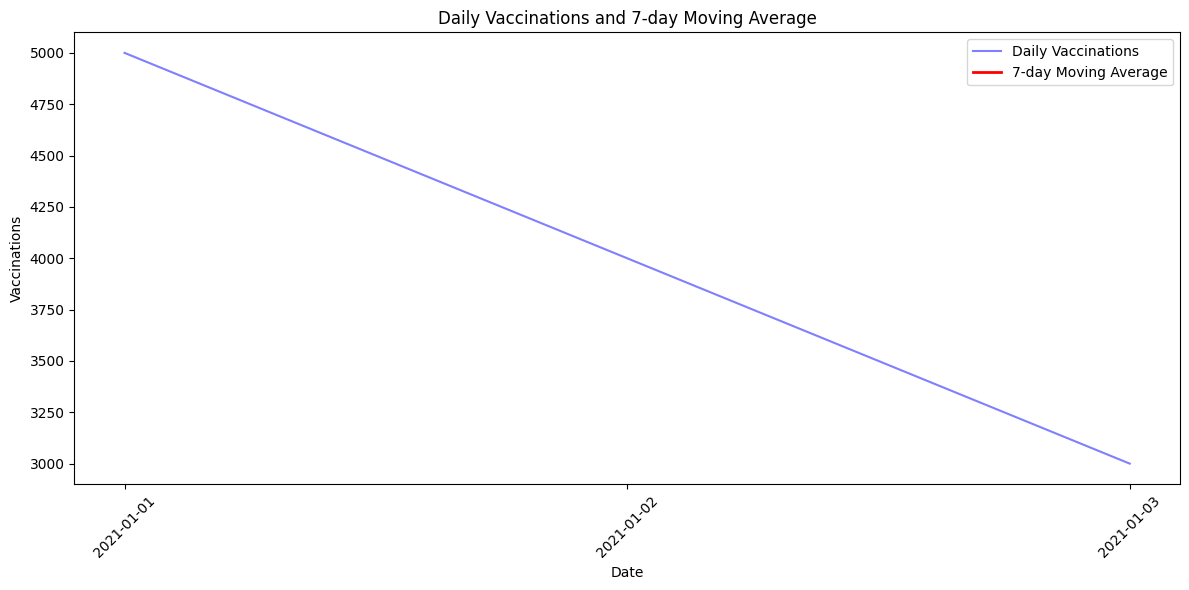

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example dictionary
data = {
    'Date': ['2021-01-01', '2021-01-02', '2021-01-03'],
    'Total_Vaccinations': [10000, 15000, 20000],
    'Daily_Vaccinations': [5000, 4000, 3000]
}

# Convert the dictionary to a DataFrame
data = pd.DataFrame(data)

# Calculate the 7-day moving average
data['7-day Moving Avg'] = data['Daily_Vaccinations'].rolling(window=7).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Daily_Vaccinations'], label='Daily Vaccinations', color='blue', alpha=0.5)
plt.plot(data['Date'], data['7-day Moving Avg'], label='7-day Moving Average', color='red', linewidth=2)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Vaccinations')
plt.title('Daily Vaccinations and 7-day Moving Average')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [ ]:
# Save the Streamlit script as a Python file
with open('solutionseekers.py', 'w') as f:
    f.write("""
import streamlit as st
import plotly.express as px

# Load data
df = px.data.iris()

# Create plot
fig = px.scatter(df, x='sepal_width', y='sepal_length', color='species')

# Create Streamlit components
st.title("Streamlit Dashboard Example")
st.write("This is a simple Streamlit dashboard.")
st.plotly_chart(fig)
""")

In [ ]:
!streamlit run solutionseekers.py & npx localtunnel --port 8501

/bin/bash: line 1: streamlit: command not found
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) ^C


In [ ]:
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙
added 22 packages in 2s
⠙
⠙3 packages are looking for funding
⠙  run `npm fund` for details
⠹

In [ ]:
!streamlit run solutionseekers.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.72.42.200:8501

⠼⠴your url is: https://blue-seas-beam.loca.lt


In [ ]:
!pip install dash jupyter-dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.5 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


In [ ]:
!pip install dash jupyter-dash
